# **Covid vs SARS vs Ebola**

**SARS**: Sars is a global pandemic witnessed in 2003. It started in China’s Guangdong province in November 2002. It is caused by SARS-CoV virus. 
<br>
<br>
**Ebola**: First emerged in 1976 in Africa. It has a very high mortality rate but is not easily transmitted.
<br>
<br>
**COVID**: It is caused by SARS-CoV-2 virus.The virus has a close resemblance to SARS-CoV. The first cases of COVID-19 were reported in Wuhan, China, in December 2019. Vaccine yet to be found.

The comparison of these three viruses is done in this notebook and the trend that covid follows in comparison to SARS & Ebola is visualized.

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloadSars = drive.CreateFile({'id': '1c8bs704TiHiWl7qkWPcp4jJ0l2DrZ3BW'})
downloadCovid= drive.CreateFile({'id':'1EUA8YOtYFdemOXhml4c33oY_eW-RI9Eh'})
downloadEbola = drive.CreateFile({'id': '1tTk8kSIR4OPh7lk2RjYTSJ9-UClgAlH3'})

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
downloadSars.GetContentFile('sars_2003_complete_dataset_clean.csv') 
downloadCovid.GetContentFile('covid_19_clean_complete.csv')
downloadEbola.GetContentFile('ebola_2014_2016_clean.csv')  
sars_03 = pd.read_csv('sars_2003_complete_dataset_clean.csv', parse_dates=['Date'])
covid_19 = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
ebola_14 = pd.read_csv('ebola_2014_2016_clean.csv', parse_dates=['Date'])

In [0]:
# ebola dataset


# ebola_14 = ebola_14[ebola_14['Date']!=max(ebola_14['Date'])]
print(ebola_14.size)
# selecting important columns only
ebola_14 = ebola_14[['Date', 'Country', 'No. of confirmed, probable and suspected cases',
                     'No. of confirmed, probable and suspected deaths']]

# renaming columns
ebola_14.columns = ['Date', 'Country', 'Cases', 'Deaths']
ebola_14.head()

# group by date and country
ebola_14 = ebola_14.groupby(['Date', 'Country'])['Cases', 'Deaths']
ebola_14 = ebola_14.sum().reset_index()

# filling missing values
ebola_14['Cases'] = ebola_14['Cases'].fillna(0)
ebola_14['Deaths'] = ebola_14['Deaths'].fillna(0)

# converting datatypes
ebola_14['Cases'] = ebola_14['Cases'].astype('int')
ebola_14['Deaths'] = ebola_14['Deaths'].astype('int')

# latest
e_lat = ebola_14[ebola_14['Date'] == max(ebola_14['Date'])].reset_index()

# latest grouped by country
e_lat_grp = e_lat.groupby('Country')['Cases', 'Deaths'].sum().reset_index()

# nth day
ebola_14['nth_day'] = (ebola_14['Date'] - min(ebola_14['Date'])).dt.days

# day by day
e_dbd = ebola_14.groupby('Date')['Cases', 'Deaths'].sum().reset_index()

# nth day
e_dbd['nth_day'] = ebola_14.groupby('Date')['nth_day'].max().values

# no. of countries
temp = ebola_14[ebola_14['Cases']>0]
e_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

e_dbd['new_cases'] = e_dbd['Cases'].diff()
e_dbd['new_deaths'] = e_dbd['Deaths'].diff()
e_dbd['epidemic'] = 'EBOLA'

e_dbd.head()
e_dbd.size

24850


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


2072

In [0]:

# selecting important columns only
covid_19 = covid_19[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]

# replacing Mainland china with just China
covid_19['Country/Region'] = covid_19['Country/Region'].replace('Mainland China', 'China')

# renaming columns
covid_19.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
covid_19 = covid_19.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
covid_19 = covid_19.sum().reset_index()

# latest
c_lat = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()

# latest grouped by country
c_lat_grp = c_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
covid_19['nth_day'] = (covid_19['Date'] - min(covid_19['Date'])).dt.days

# day by day
c_dbd = covid_19.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
c_dbd['nth_day'] = covid_19.groupby('Date')['nth_day'].max().values

# no. of countries
temp = covid_19[covid_19['Cases']>0]
c_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

c_dbd['new_cases'] = c_dbd['Cases'].diff()
c_dbd['new_deaths'] = c_dbd['Deaths'].diff()
c_dbd['epidemic'] = 'COVID-19'

c_dbd.size


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


738

In [0]:
# selecting important columns only
sars_03 = sars_03[['Date', 'Country', 'Cumulative number of case(s)', 
                   'Number of deaths', 'Number recovered']]

# renaming columns
sars_03.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
sars_03 = sars_03.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
sars_03 = sars_03.sum().reset_index()

# latest
s_lat = sars_03[sars_03['Date'] == max(sars_03['Date'])].reset_index()

# latest grouped by country
s_lat_grp = s_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
sars_03['nth_day'] = (sars_03['Date'] - min(sars_03['Date'])).dt.days

# day by day
s_dbd = sars_03.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
s_dbd['nth_day'] = sars_03.groupby('Date')['nth_day'].max().values

# no. of countries
temp = sars_03[sars_03['Cases']>0]
s_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values


s_dbd['new_cases'] = s_dbd['Cases'].diff()
s_dbd['new_deaths'] = s_dbd['Deaths'].diff()
s_dbd['epidemic'] = 'SARS'

s_dbd.head()
s_dbd.size

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


864

**Defining Visualization Libraries**

In [0]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from plotnine import *
import plotly.express as px
import folium

from IPython.display import Javascript
from IPython.core.display import display, HTML

# color pallette
cdr = ['#393e46', '#ff2e63', '#30e3ca'] # grey - red - blue
idr = ['#f8b400', '#ff2e63', '#30e3ca'] # yellow - red - blue

s = '#f0134d'
h = '#12cad6'
e = '#4a47a3'
m = '#42e6a4'
c = '#333333'

shemc = [s, h, e, m, c]
sec = [s, e, c]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Visulaization describing the worldwide spread (Total Cases) of each virus.**<br>
SARS densely effected China while Ebola densely effected Africa.<br>
COVID is spread worldwide but densely effected North America and China becoming the first "Modern Pandemic"

In [0]:
fig = px.choropleth(c_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Emrld", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(e_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Emrld", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Emrld", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()


**Visulaization describing the worldwide spread (Total Deaths) of each virus.**<br>
During SARS China had more deaths similar to number of cases likewise in Ebola Africa had more deaths.<br>
But COVID though it started in China more number of deaths are noticed in North America.

In [0]:
fig = px.choropleth(c_lat_grp[c_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(e_lat_grp[e_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.show()

#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp[s_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [0]:
# sum of cases
# -----------

c_cases = sum(c_lat_grp['Cases'])
c_deaths = sum(c_lat_grp['Deaths'])
c_no_countries = len(c_lat_grp['Country'].value_counts())

s_cases = sum(s_lat_grp['Cases'])
s_deaths = sum(s_lat_grp['Deaths'])
s_no_countries = len(s_lat_grp['Country'].value_counts())

e_cases = sum(e_lat_grp['Cases'])
e_deaths = sum(e_lat_grp['Deaths'])
e_no_countries = len(e_lat_grp['Country'].value_counts())

**Summary of statistics of 3 pandemics**<br>
Though SARS and EBOLA have high mortality rate COVID has high number of deaths worldwide.
Due to the easy transmission of COVID-19 the number of countries effected and number of confirmed cases are more than other two pandemics.

In [0]:
epidemics = pd.DataFrame({
    'epidemic' : ['COVID-19', 'SARS', 'EBOLA'],
    'start_year' : [2019, 2003, 2014],
    'end_year' : [2020, 2004, 2016],
    'confirmed' : [c_cases, s_cases, e_cases],
    'deaths' : [c_deaths, s_deaths, e_deaths],
    'no_of_countries' : [c_no_countries, s_no_countries, e_no_countries]
})

epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)
epidemics = epidemics.sort_values('end_year').reset_index(drop=True)
epidemics.head()

,epidemic,start_year,end_year,confirmed,deaths,no_of_countries,mortality
0,SARS,2003,2004,8432,813,31,9.64
1,EBOLA,2014,2016,28642,11319,10,39.52
2,COVID-19,2019,2020,1846676,114091,185,6.18


**Visulaization describing the Total Deaths caused by each virus.**

In [0]:
fig = px.pie(epidemics.sort_values(by='deaths', ascending=False).reset_index(drop=True), values = 'deaths',names='epidemic', height=400, color_discrete_sequence = px.colors.qualitative.Dark2)
fig.update_traces(textposition='inside', textinfo='label+text+value')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

**Visulaization describing the Mortality of each virus.**

In [0]:
fig = px.pie(epidemics.sort_values(by='mortality', ascending=False).reset_index(drop=True), values = 'mortality',names='epidemic', height=300, color_discrete_sequence = px.colors.qualitative.Dark2)
fig.update_traces(textposition='inside', textinfo='label+text+value')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

**Visulaization describing the Number of Countried Effected by each virus.**

In [0]:
fig = px.pie(epidemics.sort_values(by='no_of_countries', ascending=False).reset_index(drop=True), values = 'no_of_countries',names='epidemic', height=300, color_discrete_sequence = px.colors.qualitative.Dark2)
fig.update_traces(textposition='inside', textinfo='label+text+value')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

In [0]:
s_dbd = s_dbd[s_dbd['Cases'].notna()]
s_dbd = s_dbd[s_dbd['Cases']>=0]
s_dbd = s_dbd[s_dbd['Deaths'].notna()]
s_dbd = s_dbd[s_dbd['Deaths']>=0]
s_dbd = s_dbd[s_dbd['Recovered'].notna()]
s_dbd = s_dbd[s_dbd['Recovered']>=0]
s_dbd_train = s_dbd.filter(['Cases','Deaths','Recovered','nth_day'])
s_dbd_train["Active"] = s_dbd_train["Cases"] - s_dbd_train["Deaths"] - s_dbd_train["Recovered"]
s_dbd_train["Recovered/Deaths"] = s_dbd_train["Recovered"]/s_dbd_train["Deaths"]

In [0]:
e_dbd = e_dbd[e_dbd['Cases'].notna()]
e_dbd = e_dbd[e_dbd['Cases']>=0]
e_dbd = e_dbd[e_dbd['Deaths'].notna()]
e_dbd = e_dbd[e_dbd['Deaths']>=0]
e_dbd_train = e_dbd.filter(['Cases','Deaths','nth_day'])
e_dbd_train["Active"] = e_dbd_train["Cases"] - e_dbd_train["Deaths"]

In [0]:
c_dbd = c_dbd[c_dbd['Cases'].notna()]
c_dbd = c_dbd[c_dbd['Cases']>=0]
c_dbd = c_dbd[c_dbd['Deaths'].notna()]
c_dbd = c_dbd[c_dbd['Deaths']>=0]
c_dbd = c_dbd[c_dbd['Recovered'].notna()]
c_dbd = c_dbd[c_dbd['Recovered']>=0]
c_dbd_train = c_dbd.filter(['Cases','Deaths','Recovered','nth_day'])
c_dbd_train["Active"] = c_dbd_train["Cases"] - c_dbd_train["Deaths"] - c_dbd_train["Recovered"]
c_dbd_train["Recovered/Deaths"] = c_dbd_train["Recovered"]/c_dbd_train["Deaths"]

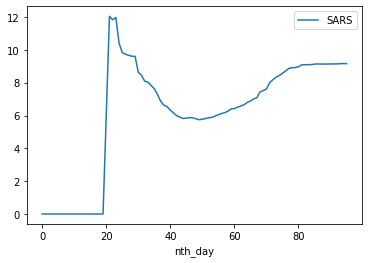

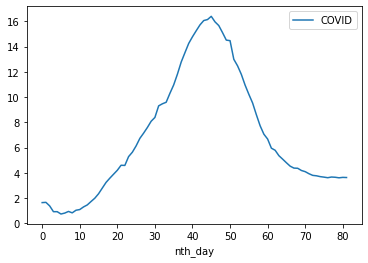

In [0]:
df = pd.DataFrame({
      'SARS': s_dbd_train["Recovered/Deaths"]
   }, index=s_dbd_train["nth_day"])
lines = df.plot.line()
df = pd.DataFrame({
      'COVID': c_dbd_train["Recovered/Deaths"]
   }, index=c_dbd_train["nth_day"])
lines = df.plot.line()

Active Cases = Total Number of Cases - Number of Deaths - Number of Recovered

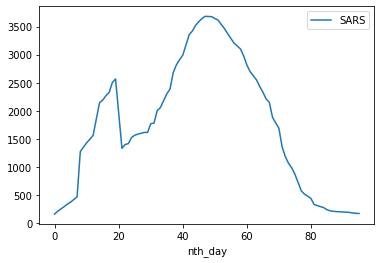

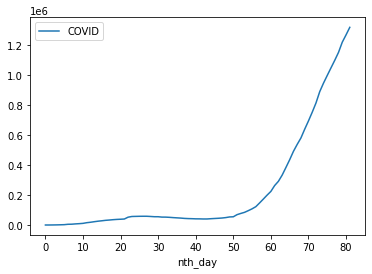

In [0]:
df = pd.DataFrame({
      'SARS': s_dbd_train["Active"]
   }, index=s_dbd_train["nth_day"])
lines = df.plot.line()
df = pd.DataFrame({
      'COVID': c_dbd_train["Active"]
   }, index=c_dbd_train["nth_day"])
lines = df.plot.line()

**To analyse the trend of Covid with respect to SARS & Ebola growth date is taken as the metric.**

In [0]:
def growth_rate(data=None):
    x = []
    x.append(0)
    for i in range(data.shape[0]-1):
        a = data.iloc[i+1]-data.iloc[i]
        x.append(a/data.iloc[i])
        
    return np.array(x)

In [0]:
pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.6.0)


In [0]:
growth_rate_covid = growth_rate(c_dbd_train["Active"])
c_dbd_train["GrowthRate"] = growth_rate_covid

In [0]:
growth_rate_sars = growth_rate(s_dbd_train["Active"])
s_dbd_train["GrowthRate"] = growth_rate_sars

In [0]:
growth_rate_ebola = growth_rate(e_dbd_train["Active"])
e_dbd_train["GrowthRate"] = growth_rate_ebola

**The growth rate of COVID seems to subside but did not reach the minimum yet.**

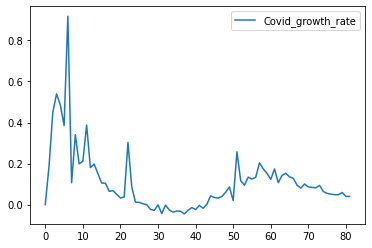

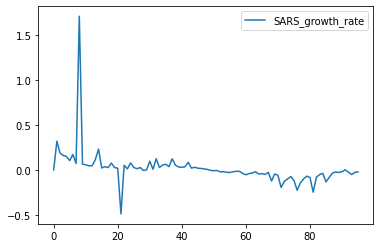

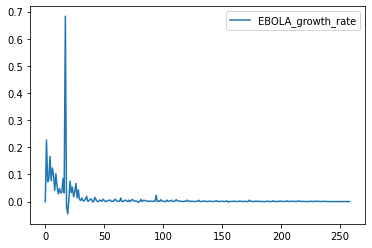

In [0]:
rate_covid = pd.DataFrame(growth_rate_covid, columns=['Covid_growth_rate'], index=c_dbd_train.index)
rate_covid.plot()

rate_sars = pd.DataFrame(growth_rate_sars, columns=['SARS_growth_rate'], index=s_dbd_train.index)
rate_sars.plot()

rate_ebola = pd.DataFrame(growth_rate_ebola, columns=['EBOLA_growth_rate'], index=e_dbd_train.index)
rate_ebola.plot()

In [0]:
from statsmodels.tsa import seasonal
decompose_covid = seasonal.seasonal_decompose(c_dbd_train.GrowthRate,freq=30)
decompose_sars = seasonal.seasonal_decompose(s_dbd_train.GrowthRate,freq=30)
decompose_ebola = seasonal.seasonal_decompose(e_dbd_train.GrowthRate,freq=30)

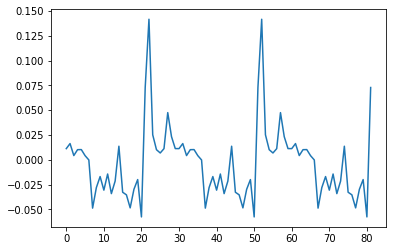

In [0]:
decompose_covid.seasonal.plot()

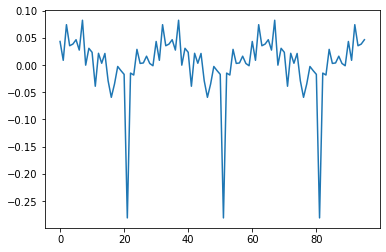

In [0]:
decompose_sars.seasonal.plot()

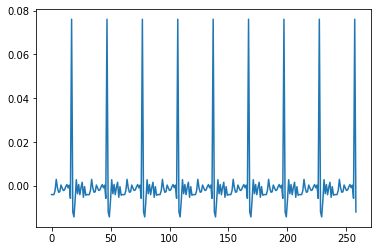

In [0]:
decompose_ebola.seasonal.plot()

**The following visualizations show the trend over a period of 30 days.** 
<br>
Growth rate of SARS seems to be subsiding month after month gradually while Growth rate of Ebola has shown a plummet after the initial high and then decreased gradually.
<br>
Growth rate of COVID showed a gradual decrease after initial high but after that it is still increasing.


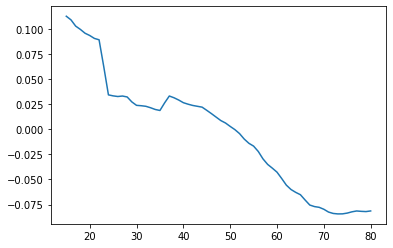

In [0]:
decompose_sars.trend.plot()

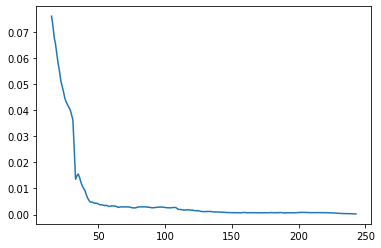

In [0]:
decompose_ebola.trend.plot()

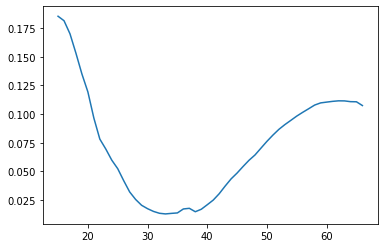

In [0]:
decompose_covid.trend.plot()

References<br>
https://www.kaggle.com/lisphilarcovid-19-data-with-sir-model#SIR-to-SIR-F <br>
https://www.kaggle.com/duttadebadri/covid-19-analysing-growth-sir-modeling-india <br>
https://www.kaggle.com/neelkudu28/covid-19-visualizations-predictions-forecasting#Prediction-using-Machine-Learning-Models <br>
https://www.kaggle.com/sudalairajkumar/covid-19-analysis-of-usa <br>
https://www.statsmodels.org/stable/index.html
